https://zhuanlan.zhihu.com/p/440147093 关联规则

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 从CSV文件加载数据
data_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/5002/DSAA5002_50015756_Gelin_Bian_final/dsaa5002_2023fall_final_datasets/Data_Q4/retail.csv')
data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009/12/1 7:45,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009/12/1 7:45,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009/12/1 7:45,1.25,13085.0


# Data preprocessing

In [ ]:
data_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,Price,Customer ID
count,1000000.000000,1000000.000000,774502.000000
mean,10.053332,4.669050,15325.209913
std,136.005474,125.621421,1694.663838
min,-74215.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.100000,15262.000000
75%,10.000000,4.150000,16794.000000
max,74215.000000,38970.000000,18287.000000


删除缺失值

In [ ]:
data_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transaction_id     48575
Product_id         48575
Description        52906
Quantity           48575
Date               48575
Price              48575
Customer ID       274073
dtype: int64

In [ ]:
data_df[data_df.isnull().any(axis=1)].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID
263,489464,21733,85123a mixed,-96.0,2009/12/1 10:52,0.00,NaN
283,489463,71477,short,-240.0,2009/12/1 10:52,0.00,NaN
284,489467,85123A,21733 mixed,-192.0,2009/12/1 10:53,0.00,NaN
470,489521,21646,NaN,-50.0,2009/12/1 11:44,0.00,NaN
577,489525,85226C,BLUE PULL BACK RACING CAR,1.0,2009/12/1 11:49,0.55,NaN


In [ ]:
data_df = data_df.dropna()  # 删除包含缺失值的行

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transaction_id    0
Product_id        0
Description       0
Quantity          0
Date              0
Price             0
Customer ID       0
dtype: int64

删除负值

In [ ]:
# 删除Quantity列中的负数值
data_df = data_df[data_df['Quantity'] >= 0]

# 删除Price列中的负数值
data_df = data_df[data_df['Price'] >= 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


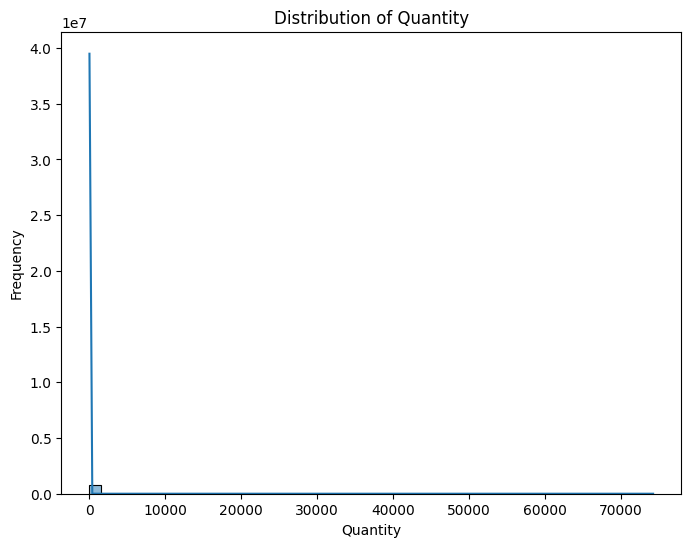

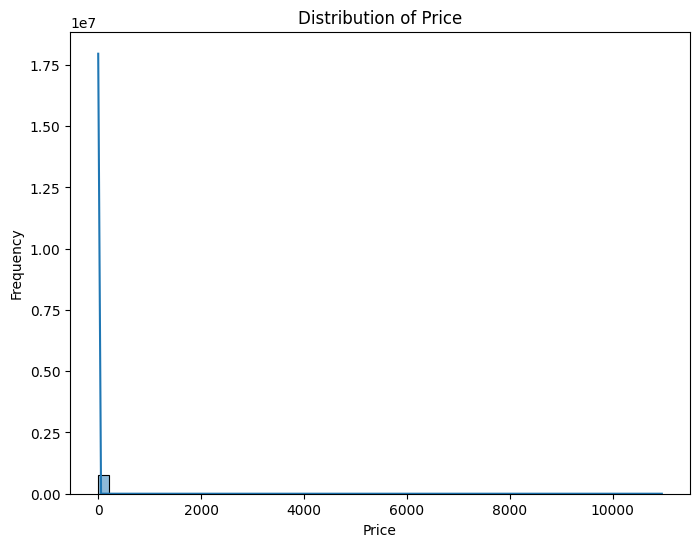

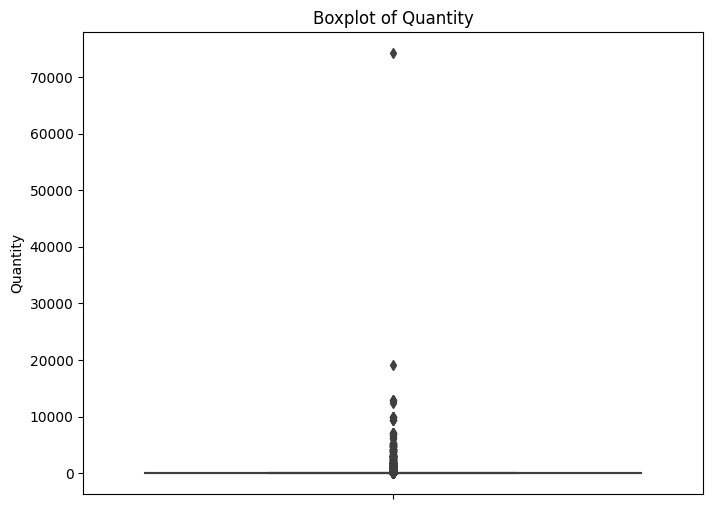

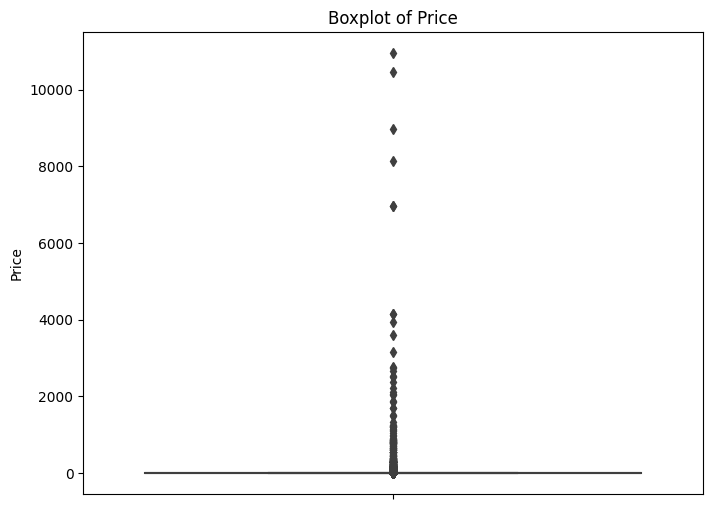

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制Quantity的直方图
plt.figure(figsize=(8, 6))
sns.histplot(data_df['Quantity'], bins=50, kde=True)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

# 绘制Price的直方图
plt.figure(figsize=(8, 6))
sns.histplot(data_df['Price'], bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

# 绘制Quantity的箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_df, y='Quantity')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantity')
plt.show()

# 绘制Price的箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_df, y='Price')
plt.ylabel('Price')
plt.title('Boxplot of Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


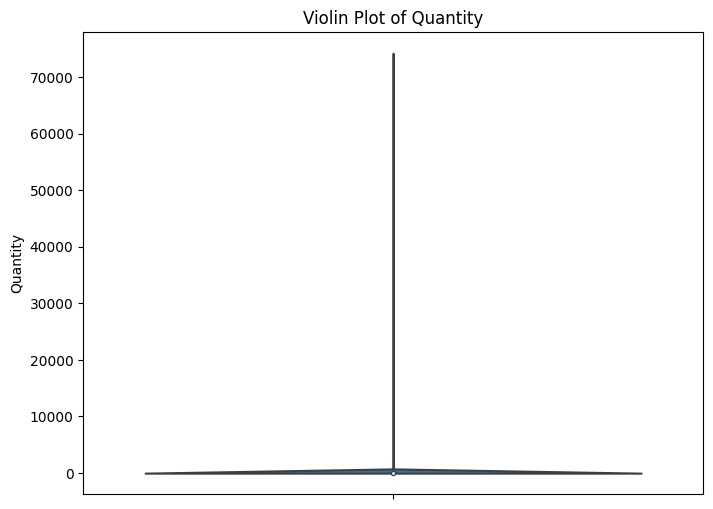

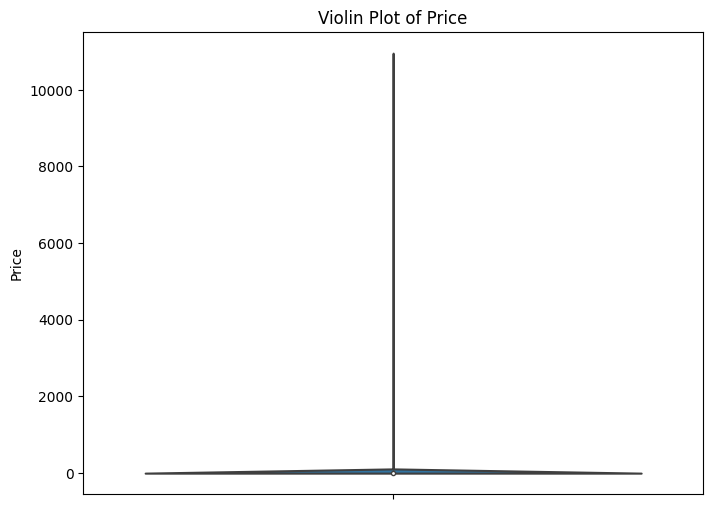

In [ ]:
# 绘制Quantity的修剪线框图
plt.figure(figsize=(8, 6))
sns.violinplot(data=data_df, y='Quantity')
plt.ylabel('Quantity')
plt.title('Violin Plot of Quantity')
plt.show()

# 绘制Price的修剪线框图
plt.figure(figsize=(8, 6))
sns.violinplot(data=data_df, y='Price')
plt.ylabel('Price')
plt.title('Violin Plot of Price')
plt.show()

In [ ]:
data_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,Price,Customer ID
count,756597.000000,756597.000000,756597.000000
mean,13.380629,3.231694,15332.519295
std,115.015792,29.971208,1693.988043
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13979.000000
50%,5.000000,1.950000,15272.000000
75%,12.000000,3.750000,16798.000000
max,74215.000000,10953.500000,18287.000000


In [ ]:
import numpy as np

# 计算Quantity和Price在80%、90%和95%的数据值
quantity_85 = np.percentile(data_df['Quantity'], 85)
quantity_90 = np.percentile(data_df['Quantity'], 90)
quantity_95 = np.percentile(data_df['Quantity'], 95)

price_85 = np.percentile(data_df['Price'], 85)
price_90 = np.percentile(data_df['Price'], 90)
price_95 = np.percentile(data_df['Price'], 95)

# 打印结果
print("Quantity:")
print("85th percentile:", quantity_85)
print("90th percentile:", quantity_90)
print("95th percentile:", quantity_95)
print()
print("Price:")
print("85th percentile:", price_85)
print("90th percentile:", price_90)
print("95th percentile:", price_95)

Quantity:
85th percentile: 18.0
90th percentile: 24.0
95th percentile: 36.0

Price:
85th percentile: 4.95
90th percentile: 6.75
95th percentile: 8.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 保留95%以下的值，并删除高于95%的值
data_df = data_df[data_df['Quantity'] <= quantity_95]
data_df = data_df[data_df['Price'] <= price_95]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,Price,Customer ID
count,684757.000000,684757.000000,684757.000000
mean,7.607905,2.522127,15354.217438
std,7.464849,1.977957,1690.851884
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13999.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.250000,16814.000000
max,36.000000,8.500000,18287.000000


In [ ]:
# 统计交易数量
transaction_count = len(data_df['Transaction_id'].unique())

# 统计商品种类数量
product_count = len(data_df['Product_id'].unique())

# 统计客户数量
customer_count = len(data_df['Customer ID'].unique())

print("交易数量：", transaction_count)
print("商品种类数量：", product_count)
print("客户数量：", customer_count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


交易数量： 32098
商品种类数量： 4366
客户数量： 5611


In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 选择用于聚类的特征列
features = ['Quantity', 'Price']

# 提取用于聚类的数据
customer_data = data_df[features]

# 数据标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# 执行聚类
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_data)

# 获取聚类结果
customer_clusters = kmeans.labels_

# 将聚类结果添加到数据中
data_df['Cluster'] = customer_clusters

# 输出每个聚类的客户数量
cluster_counts = data_df['Cluster'].value_counts()
print("聚类结果：")
print(cluster_counts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


聚类结果：
1    210288
4    168627
3    163494
2     72666
0     69682
Name: Cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


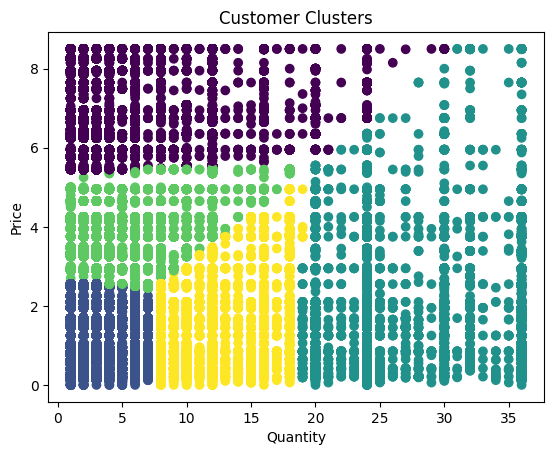

In [ ]:
# 可视化聚类结果
plt.scatter(data_df['Quantity'], data_df['Price'], c=data_df['Cluster'])
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Customer Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


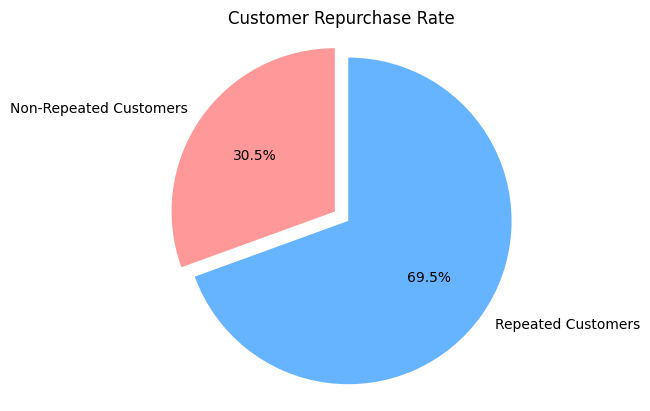

复购率：69.45%


In [ ]:
# 选择用于复购率分析的特征列
customer_data = data_df[['Customer ID', 'Product_id', 'Transaction_id']]

# 根据Customer ID和Product_id进行分组，并计算每个客户对每个产品的购买次数
purchase_counts = customer_data.groupby(['Customer ID', 'Product_id']).size().reset_index(name='PurchaseCount')

# 计算每个客户的复购次数（购买次数大于1的产品）
repurchase_counts = purchase_counts[purchase_counts['PurchaseCount'] > 1].groupby('Customer ID').size().reset_index(name='RepurchaseCount')

# 计算客户复购率
repurchase_rate = len(repurchase_counts) / len(data_df['Customer ID'].unique())

# 可视化复购率
labels = ['Non-Repeated Customers', 'Repeated Customers']
sizes = [len(data_df['Customer ID'].unique()) - len(repurchase_counts), len(repurchase_counts)]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # 部分突出显示

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 使饼图为正圆形
plt.title('Customer Repurchase Rate')
plt.show()

print("复购率：{:.2%}".format(repurchase_rate))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


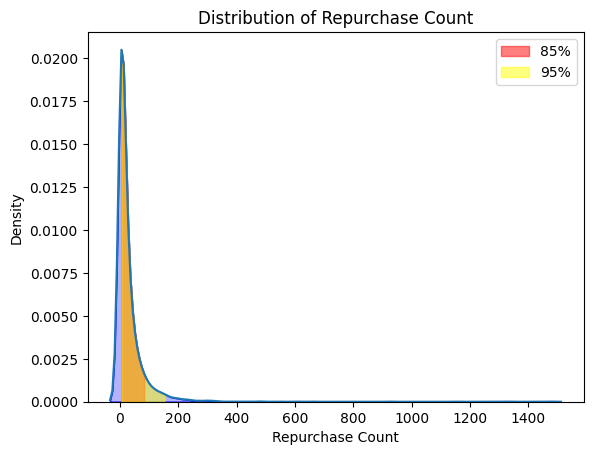

In [ ]:
# 绘制复购次数的分布曲线图

sns.kdeplot(repurchase_counts['RepurchaseCount'], color='blue', fill=True, alpha=0.3)
plt.xlabel('Repurchase Count')
plt.ylabel('Density')
plt.title('Distribution of Repurchase Count')

# 计算并绘制 85% 和 95% 区域
density = sns.kdeplot(repurchase_counts['RepurchaseCount'])
x, y = density.lines[0].get_data()
mask_85 = (x >= np.percentile(repurchase_counts['RepurchaseCount'], 7.5)) & (x <= np.percentile(repurchase_counts['RepurchaseCount'], 92.5))
mask_95 = (x >= np.percentile(repurchase_counts['RepurchaseCount'], 2.5)) & (x <= np.percentile(repurchase_counts['RepurchaseCount'], 97.5))
plt.fill_between(x[mask_85], y[mask_85], color='red', alpha=0.5, label='85%')
plt.fill_between(x[mask_95], y[mask_95], color='yellow', alpha=0.5, label='95%')

# 添加图例
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


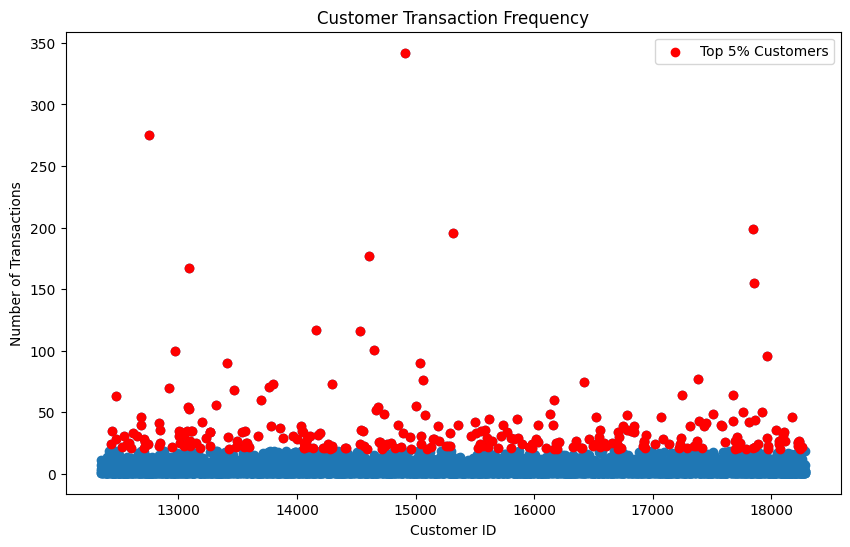

In [ ]:

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(customer_frequency.index, customer_frequency.values)
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.title('Customer Transaction Frequency')
# 确定 95% 的数据点
threshold_95 = np.percentile(customer_frequency.values, 95)
above_threshold_indices = np.where(customer_frequency.values > threshold_95)[0]
below_threshold_indices = np.where(customer_frequency.values <= threshold_95)[0]

# 绘制超过 95% 阈值的数据点
plt.scatter(customer_frequency.index[above_threshold_indices], customer_frequency.values[above_threshold_indices], color='red', label='Top 5% Customers')

# 添加图例
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


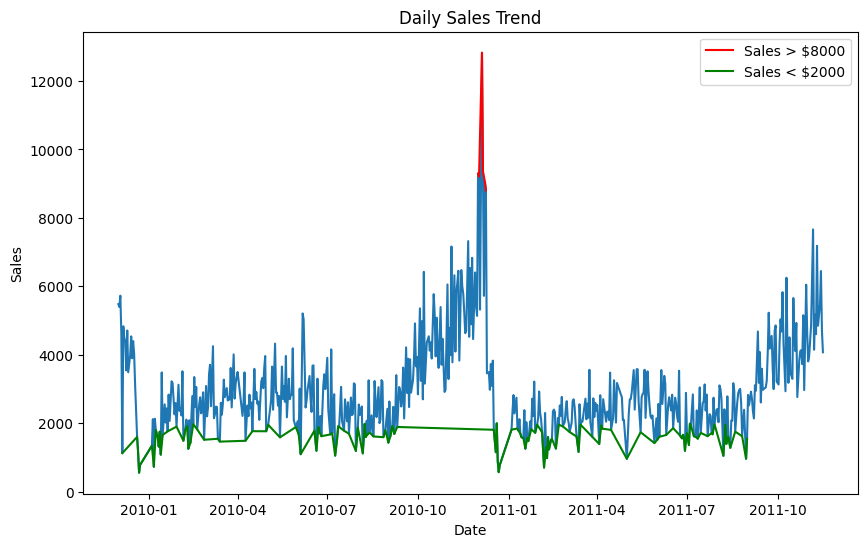

In [ ]:
import matplotlib.pyplot as plt

# 按日期计算每日销售额
data_df['Date'] = pd.to_datetime(data_df['Date'])
daily_sales = data_df.groupby(data_df['Date'].dt.date)['Price'].sum()

# 绘制销售额趋势图
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Trend')
# 确定大于8000和小于2000的日期范围
above_8000_indices = daily_sales.values > 8000
below_2000_indices = daily_sales.values < 2000

# 绘制大于8000的部分
plt.plot(daily_sales.index[above_8000_indices], daily_sales.values[above_8000_indices], color='red', label='Sales > $8000')

# 绘制小于1500的部分
plt.plot(daily_sales.index[below_2000_indices], daily_sales.values[below_2000_indices], color='green', label='Sales < $2000')

# 添加图例
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


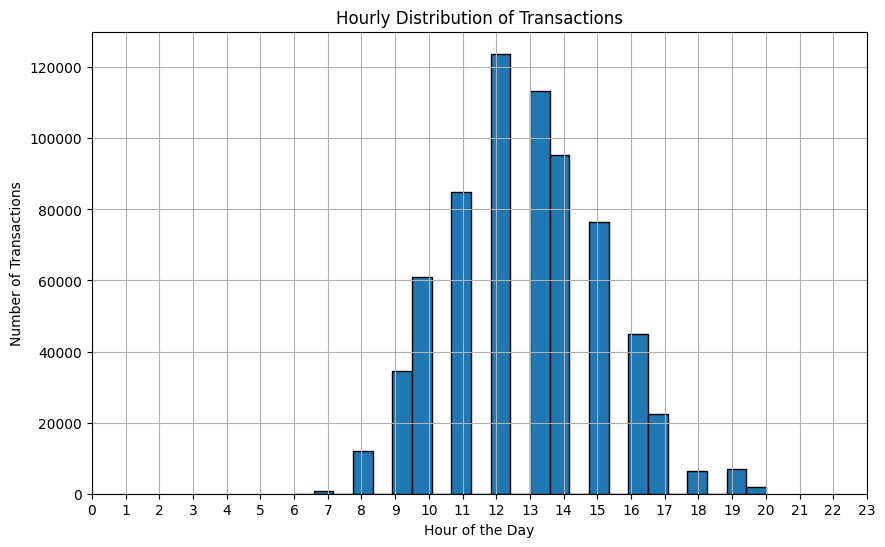

In [ ]:
data_df['Hour'] = data_df['Date'].dt.hour

# 绘制交易时间分布图
plt.figure(figsize=(10, 6))
data_df['Hour'].hist(bins=24, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Distribution of Transactions')
plt.xticks(range(0, 24))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 选择价格和时间作为特征
features = data_df[['Price', 'Hour']]

# 对特征进行预处理，如归一化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 聚类算法
k = 4  # 聚类的簇数
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_features)

# 获取聚类结果
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


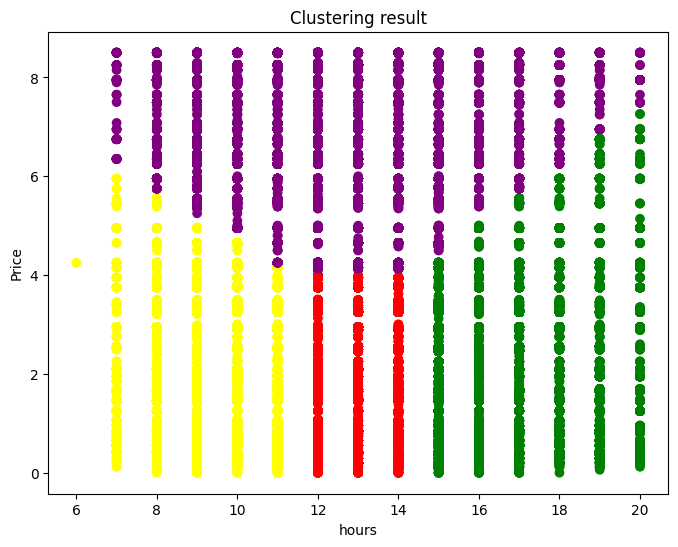

In [ ]:
# 可视化聚类结果
plt.figure(figsize=(8, 6))

# 根据聚类结果为不同的簇分配不同的颜色
colors = ['red', 'purple', 'green', 'yellow']
cluster_colors = [colors[label] for label in labels]

# 绘制散点图
plt.scatter(data_df['Hour'], data_df['Price'], c=cluster_colors) #
plt.xlabel('hours')
plt.ylabel('Price')
plt.title('Clustering result')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


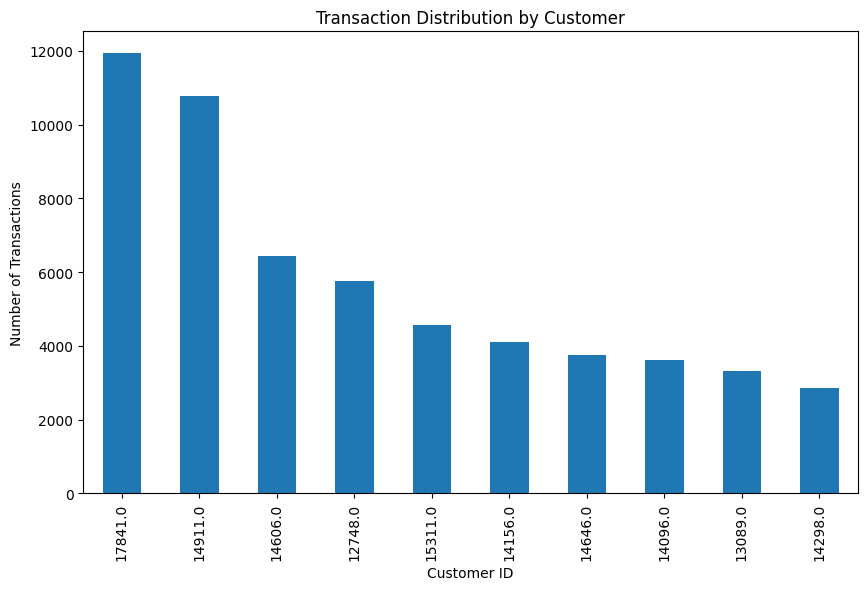

In [ ]:
top_customers = data_df.groupby('Customer ID')['Transaction_id'].count().nlargest(10)
customer_locations = data_df[data_df['Customer ID'].isin(top_customers.index)]

# 绘制顾客分布图
plt.figure(figsize=(10, 6))
customer_locations['Customer ID'].value_counts().plot(kind='bar')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.title('Transaction Distribution by Customer')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


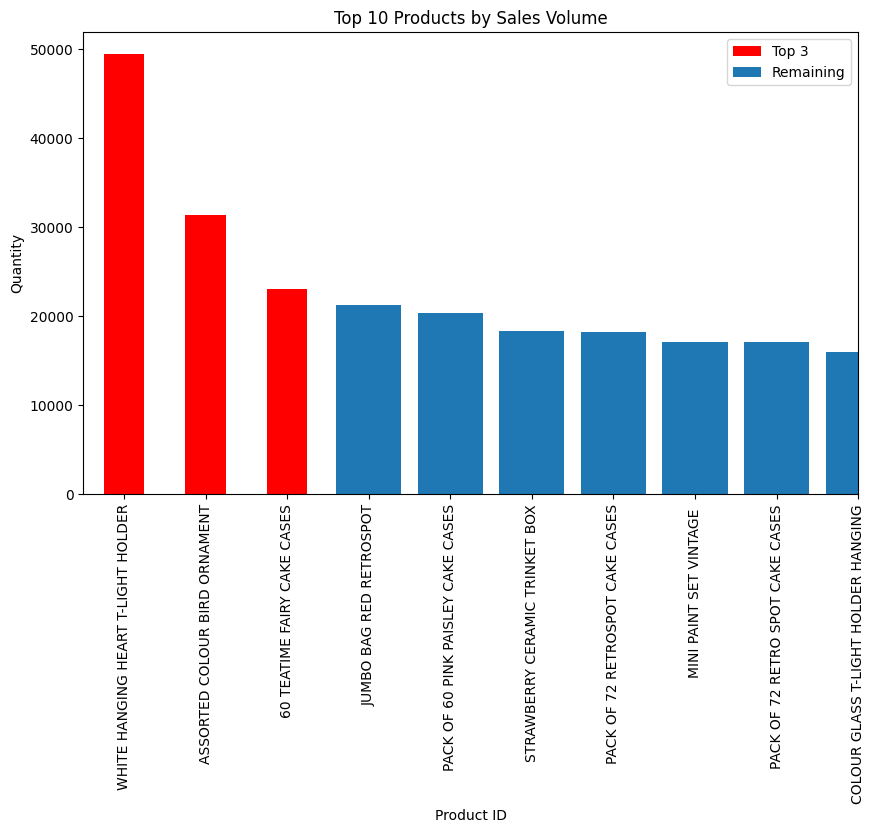

In [ ]:
top_products = data_df.groupby('Description')['Quantity'].sum().nlargest(10)

# 绘制产品销量排行榜
plt.figure(figsize=(10, 6))
# 设置前三个产品的颜色
colors = ['red', 'red', 'red']


# 绘制前三个产品的条形，并设置颜色
top_products.head(3).plot(kind='bar', color=colors)

# 绘制剩余产品的条形，使用默认颜色，并添加偏移量
x = np.arange(3, 10)
plt.bar(x, top_products.iloc[3:].values.flatten())
plt.xlabel('Product ID')
plt.ylabel('Quantity')
plt.title('Top 10 Products by Sales Volume')
x_ticks_labels = top_products.index.tolist()
plt.xticks(np.arange(10), x_ticks_labels)
plt.legend(['Top 3', 'Remaining'])
plt.show()

In [ ]:
top_products.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'ASSORTED COLOUR BIRD ORNAMENT',
       '60 TEATIME FAIRY CAKE CASES', 'JUMBO BAG RED RETROSPOT',
       'PACK OF 60 PINK PAISLEY CAKE CASES', 'STRAWBERRY CERAMIC TRINKET BOX',
       'PACK OF 72 RETROSPOT CAKE CASES', 'MINI PAINT SET VINTAGE',
       'PACK OF 72 RETRO SPOT CAKE CASES',
       'COLOUR GLASS T-LIGHT HOLDER HANGING'],
      dtype='object', name='Description')

In [ ]:
df=data_df[data_df['Description'].isin(top_products)]
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID,Hour,Cluster


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


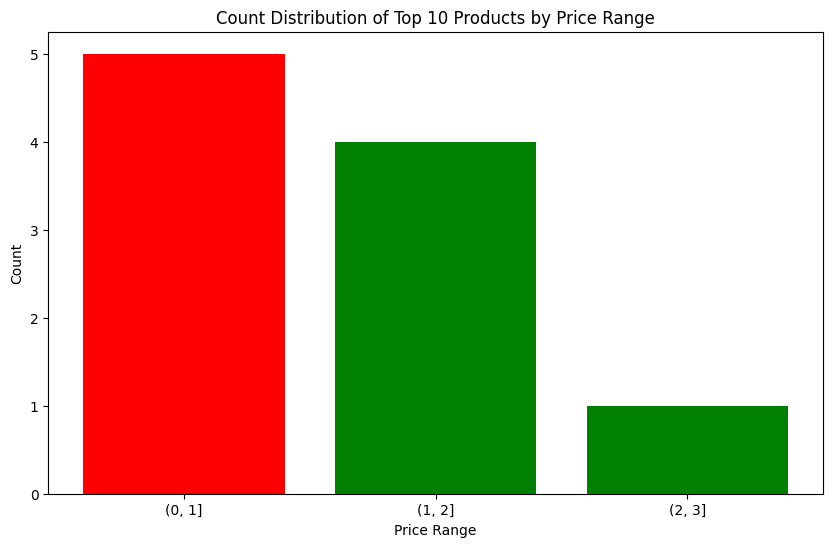

In [ ]:
import matplotlib.pyplot as plt
top_products = data_df.groupby('Product_id')['Quantity'].sum().nlargest(10).index
# 获取这10个产品的价格数据
# 获取这10个产品的价格数据（唯一值）
top_products_prices = data_df[data_df['Product_id'].isin(top_products)].drop_duplicates(subset='Product_id')['Price']


# 设置价格区间
bins = [0, 1, 2, 3]  #

# 统计价格区间内产品的数量
price_counts = pd.cut(top_products_prices, bins=bins).value_counts().sort_index()
colors = ['red', 'green', 'green']
# 绘制产品价格分布
plt.figure(figsize=(10, 6))
plt.bar(price_counts.index.astype(str), price_counts.values, color = colors)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Count Distribution of Top 10 Products by Price Range')
plt.show()

In [ ]:
data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID,Hour,Cluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,7,0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,7,0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,7,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,7,2
5,489434,22064,PINK DOUGHNUT TRINKET POT,24.0,2009-12-01 07:45:00,1.65,13085.0,7,2


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 将数据按照交易进行合并，获取每个交易中的产品组合
merged_data = data_df.groupby('Transaction_id')['Product_id'].apply(lambda x: list(set(x)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
merged_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transaction_id
489434    [21232, 85048, 79323P, 79323W, 21871, 21523, 2...
489435                         [22353, 22350, 22195, 22349]
489436    [82582, 21754, 22107, 22194, 21333, 48173C, 22...
489437    [22130, 22274, 10002, 20703, 20971, 22143, 206...
489438           [21252, 21329, 21100, 21410, 21411, 21033]
Name: Product_id, dtype: object

交易数量： 32098
商品种类数量： 4366
客户数量： 5611

In [ ]:
# 将产品组合转换为独热编码
encoded_data = merged_data.apply(lambda x: pd.Series(1, index=x)).fillna(0)

# 运行关联规则挖掘
frequent_itemsets = apriori(encoded_data, min_support=0.02, use_colnames=True)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.052215,(21232)
1,0.025703,(21523)
2,0.040906,(22111)
3,0.045236,(21755)
4,0.041249,(21181)
...,...,...
230,0.026232,"(22383, 22382)"
231,0.021839,"(22382, 22384)"
232,0.023179,"(22383, 22384)"
233,0.024488,"(22469, 22470)"


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] == 2) &(frequent_itemsets['support'] >= 0.02) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
203,0.023896,"(21232, 21231)",2
204,0.023927,"(21755, 21754)",2
205,0.032370,"(85123A, 21733)",2
206,0.022120,"(20725, 85099B)",2
207,0.024207,"(21931, 85099B)",2
208,0.020842,"(85099B, 85099C)",2
209,0.024394,"(85099B, 85099F)",2
210,0.027915,"(22386, 85099B)",2
211,0.021372,"(22411, 85099B)",2
212,0.024301,"(20725, 20726)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)



In [ ]:
# 根据置信度和支持度筛选关联规则
filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['support'] > 0.02)]


In [ ]:
sorted_rules_by_confidence = filtered_rules.sort_values(by='confidence', ascending=False)
sorted_rules_by_lift = filtered_rules.sort_values(by='lift', ascending=False)
sorted_rules_by_support = rules.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
BuyAB = sorted_rules_by_confidence[(sorted_rules_by_confidence['antecedents'].apply(lambda x :len(x)==1)) & (sorted_rules_by_confidence['consequents'].apply(lambda x :len(x)==1))]
BuyAtoB = sorted_rules_by_lift[(sorted_rules_by_lift['antecedents'].apply(lambda x :len(x)==1)) & (sorted_rules_by_lift['consequents'].apply(lambda x :len(x)==1))]
Buy = sorted_rules_by_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
BuyAB.head() #Buy a and b together

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
62,(22697),(22699),0.027136,0.030376,0.021466,0.791045,26.042005,0.020641,4.640345,0.988422
1,(21231),(21232),0.032463,0.052215,0.023896,0.736084,14.097159,0.022201,3.591243,0.960236
63,(22699),(22697),0.030376,0.027136,0.021466,0.706667,26.042005,0.020641,3.316583,0.991725
5,(21733),(85123A),0.046888,0.138856,0.032370,0.690365,4.971808,0.025859,2.781162,0.838166
13,(85099F),(85099B),0.040439,0.082310,0.024394,0.603236,7.328789,0.021066,2.312934,0.899944


In [ ]:
BuyAtoB.head() # Buy a first and buy b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
63,(22699),(22697),0.030376,0.027136,0.021466,0.706667,26.042005,0.020641,3.316583,0.991725
62,(22697),(22699),0.027136,0.030376,0.021466,0.791045,26.042005,0.020641,4.640345,0.988422
1,(21231),(21232),0.032463,0.052215,0.023896,0.736084,14.097159,0.022201,3.591243,0.960236
47,(82482),(82494L),0.048632,0.051312,0.028787,0.591928,11.535952,0.026291,2.324808,0.960002
46,(82494L),(82482),0.051312,0.048632,0.028787,0.561020,11.535952,0.026291,2.167223,0.962713


In [ ]:
Buy.head() # buy most

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(85123A),(21733),0.138856,0.046888,0.032370,0.233116,4.971808,0.025859,1.242838,0.927680
5,(21733),(85123A),0.046888,0.138856,0.032370,0.690365,4.971808,0.025859,2.781162,0.838166
29,(22384),(20725),0.053212,0.071936,0.028818,0.541569,7.528490,0.024990,2.024436,0.915909
28,(20725),(22384),0.071936,0.053212,0.028818,0.400606,7.528490,0.024990,1.579576,0.934387
47,(82482),(82494L),0.048632,0.051312,0.028787,0.591928,11.535952,0.026291,2.324808,0.960002
